In [1]:
# https://drive.google.com/file/d/1p7F_9VuRd1XIxHri5kQEd-e8-eoA_9-I/view?usp=sharing
!pip install -U --no-cache-dir gdown --pre
# !gdown 1p7F_9VuRd1XIxHri5kQEd-e8-eoA_9-I
!gdown "1p7F_9VuRd1XIxHri5kQEd-e8-eoA_9-I&confirm=t"

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1p7F_9VuRd1XIxHri5kQEd-e8-eoA_9-I&confirm=t
To: /content/AgeDataset-V1.csv
100% 117M/117M [00:01<00:00, 68.1MB/s]


# Vấn đề
Trong xã hội ngày nay, việc dự đoán tuổi thọ và ước tính thời gian mỗi người có thể sống được là một thách thức lớn đối với cả y học và khoa học dữ liệu. Với sự phát triển của công nghệ và dữ liệu, chúng ta có cơ hội tiếp cận các phương pháp mới để xây dựng các mô hình dự đoán chính xác hơn về tuổi thọ.\
Việc dự đoán tuổi thọ không chỉ là một bài toán khoa học mà còn là một vấn đề có ý nghĩa lớn đối với xã hội.
# Mục đích
Mục tiêu của notebook này là sử dụng các phương pháp phân tích dữ liệu và học máy để xây dựng một mô hình dự đoán tuổi thọ. Bằng cách phân tích các mối quan hệ giữa các đặc trưng trong tập dữ liệu, chúng tôi hy vọng rằng mô hình của chúng tôi có thể cung cấp những ước tính chính xác về tuổi thọ của một người dựa trên thông tin ngây thơ, khái quát của một người

# Dataset overvieư

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# for drawing
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
age=pd.read_csv('./AgeDataset-V1.csv')
age.head(20)


,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0
6,Q272,Paul Morand,French writer,Male,France,Artist,1888,1976.0,NaN,88.0
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926.0,natural causes,86.0
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0


In [4]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


Với cột bao gồm như tên, mô tả ngắn gọn của họ, nghề nghiệp chính, năm sinh, năm mất, nguyên nhân cái chết, tuổi thọ... Số hàng cho ta biết được dữ liệu thống kê được tổng cộng 1223009 người khác nhau.\
*Nguồn*: \
https://workshop-proceedings.icwsm.org/abstract?id=2022_82 \
https://www.kaggle.com/datasets/imoore/age-dataset/data \
<br>
Mục đích chính của ta là dự đoán Age of death (tuổi thọ) nên trước khi tiến hành phân tích dữ liệu, features hay làm sạch ta cần xác định sử dụng những features nào để dự đoán ?\
Như đã đề cập ta mong muốn một mô hình có thể cho ra kết quả là tuổi thọ của người khỏe mạnh thông thường nên những dữ liệu mà có thể quan tâm sẽ là: \
- Gender
- Country
- Occupation
- Birth year

Có nhiều nguyên nhân cho việc không sử dụng các cột khác trừ cột Age of death trong trường hợp này:\
&nbsp;&nbsp;&nbsp;&nbsp;1. Ta mong muốn dự đoán cho một người khỏe mạnh <br>
&nbsp;&nbsp;&nbsp;&nbsp;2. Thông tin mang tính chủ quan sẽ bị loại bỏ vì chúng thường không thống nhất.

Text(0.5, 1.0, 'Age histogram')

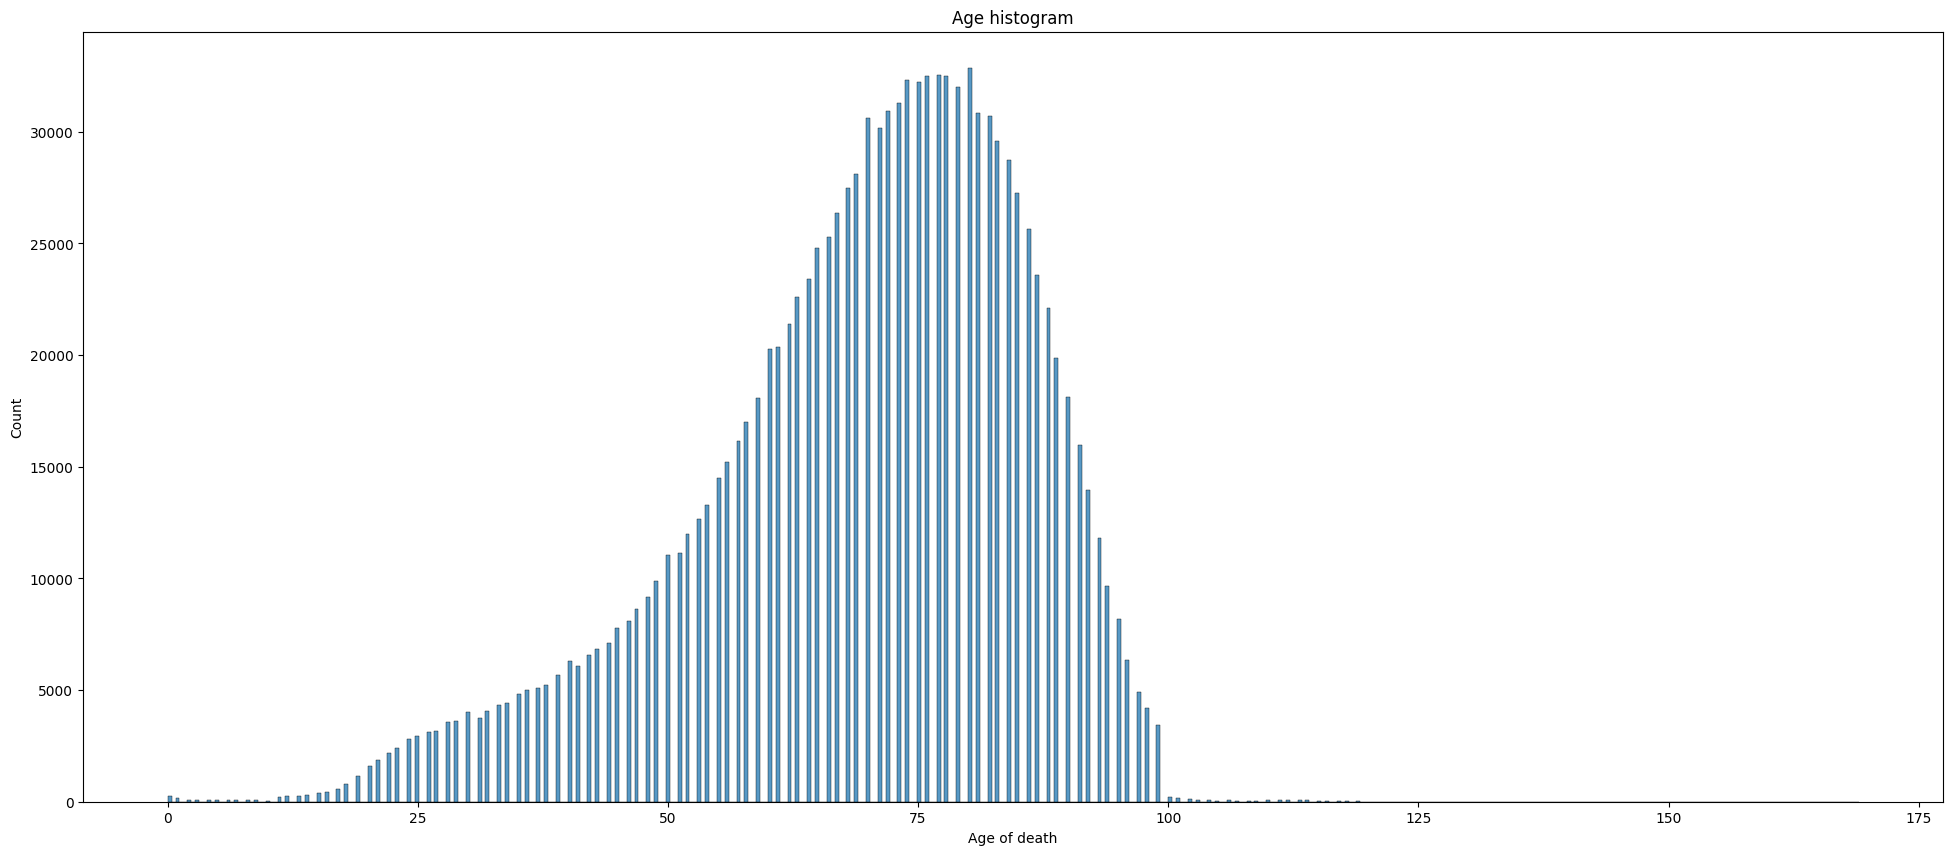

In [5]:
# plt of age histogram age dagtaset
plt.figure(figsize=(24,10))

sns.histplot(age['Age of death'])

plt.title(f'Age histogram')

# Phân tích dữ liệu

Ta sẽ loại bỏ những cột không cần thiết để phục vụ việc phân tích và xây dựng mô hình

In [6]:
age.drop(['Id','Name','Short description','Manner of death'],axis=1,inplace=True)
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Gender        1089363 non-null  object 
 1   Country       887500 non-null   object 
 2   Occupation    1016095 non-null  object 
 3   Birth year    1223009 non-null  int64  
 4   Death year    1223008 non-null  float64
 5   Age of death  1223008 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.0+ MB


In [7]:
age

,Gender,Country,Occupation,Birth year,Death year,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Male,United States of America,Politician,1809,1865.0,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0
...,...,...,...,...,...,...
1223004,NaN,France,Tailor; model,1907,1996.0,89.0
1223005,NaN,Canada; United States of America,Athlete,1948,2004.0,56.0
1223006,NaN,Germany,Military personnel,1920,1944.0,24.0
1223007,Male,United Kingdom,Artist,1887,1915.0,28.0


In [8]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Gender        1089363 non-null  object 
 1   Country       887500 non-null   object 
 2   Occupation    1016095 non-null  object 
 3   Birth year    1223009 non-null  int64  
 4   Death year    1223008 non-null  float64
 5   Age of death  1223008 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.0+ MB


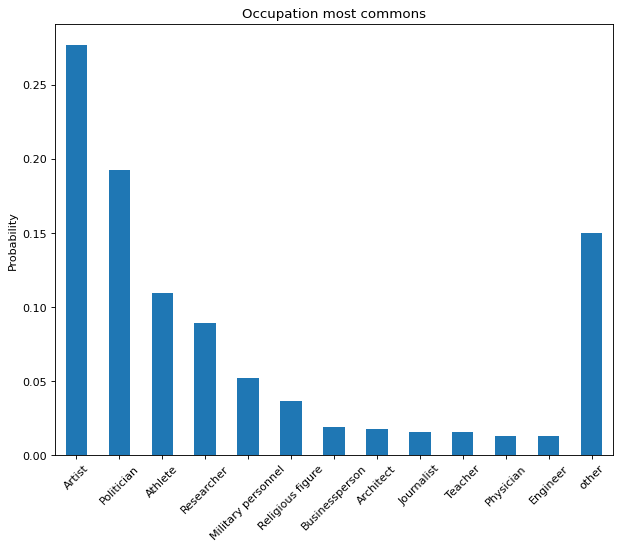

In [9]:
figure(figsize=(9, 7), dpi=80)
prob = age['Occupation'].value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.title('Occupation most commons')
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()

## Năm sinh ảnh hưởng thế nào tới đời sống của người đó ?
Đời sống phát triển theo từng niên đại cũng cho thất tuổi thọ của con người luôn có xu hướng tăng dần theo thời gian đó là những gì ta biết về nó. Và ta cần xem xét dữ liệu có phản ánh điều đó.\
Ta sẽ thêm 2 cột để xác định thời điểm sống của mỗi người trong tập dữ liệu

In [10]:
# transfrom to century with birht year
def transform_year(year):
  if year%100 > 0:
    return year//100 + 1
  else:
    return year//100

# Century birth and Death
age['Birth century'] = age['Birth year'].apply(lambda x:transform_year(x))
age['Death century'] = age['Death year'].apply(lambda x:transform_year(x))


age.head(10)

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0,18,18.0
1,Male,United Kingdom,Artist,1952,2001.0,49.0,20,21.0
2,Male,United States of America,Politician,1809,1865.0,56.0,19,19.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0,18,18.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0,18,19.0
5,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,42.0,18,19.0
6,Male,France,Artist,1888,1976.0,88.0,19,20.0
7,Male,France,Artist,1840,1926.0,86.0,19,20.0
8,Male,Spain,Artist,1599,1660.0,61.0,16,17.0
9,Male,Spain; Republic of Venice,Artist,1541,1614.0,73.0,16,17.0


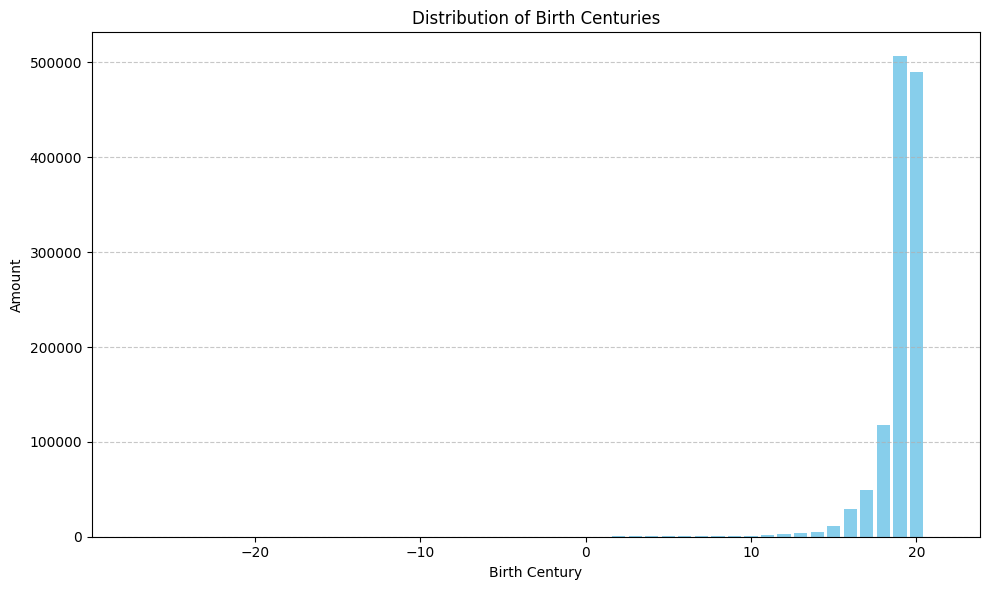

In [11]:
birth_century_counts = age['Birth century'].value_counts()


sorted_birth_century_counts = dict(sorted(birth_century_counts.items()))

plt.figure(figsize=(10, 6))
plt.bar(sorted_birth_century_counts.keys(), sorted_birth_century_counts.values(), color='skyblue')
plt.xlabel('Birth Century')
plt.ylabel('Amount')
plt.title('Distribution of Birth Centuries')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Số lượng người ít tại những người sống tại năm trước công nguyên, có lẽ ta sẽ không quan tâm đến những người đã sống cách đây quá xa thời điểm hiện tại, cũng vì lượng dữ liệu của nhóm người này hạn chế nên không thể đánh giá dựa vào chúng tránh khiến mô hình của ta trở nên overfitting với chúng

Tuổi trung bình của người qua từng thời kỳ trước công nguyên

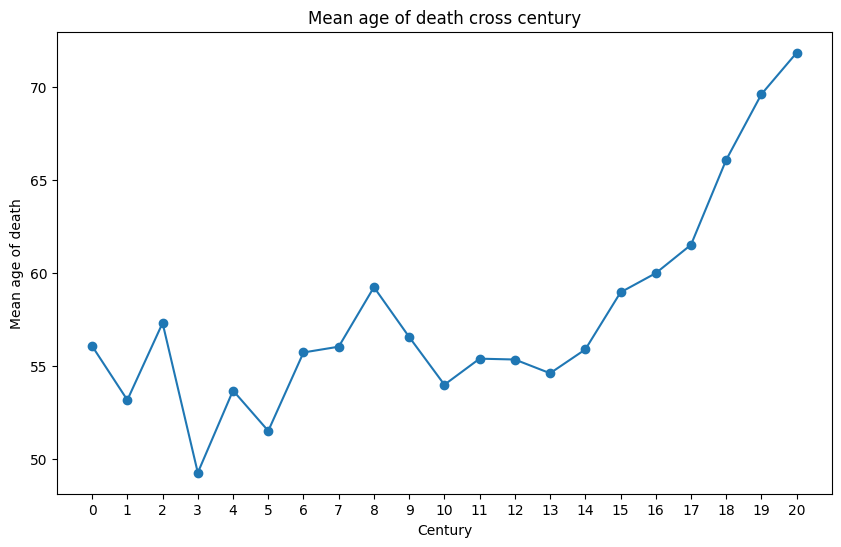

In [12]:
mean_ages = []

for century in range(0,21):
  mean = age.loc[(age['Birth century'] == century),'Age of death'].mean()
  mean_ages.append(mean)

plt.figure(figsize=(10,6))
plt.plot(range(0, 21), mean_ages, marker='o', linestyle='-')
plt.title('Mean age of death cross century')
plt.xlabel('Century')
plt.ylabel('Mean age of death')
plt.xticks(range(0,21))
plt.show()


Ta sẽ chỉ lấy dữ liệu của người sống ở thể ký 19 và 20 trong notebook này. Đồng thời ta sẽ kiểm ta phân phối năm sinh đối với tuôi trung bình

In [13]:
age = age.drop(age[age['Birth century'] < 19].index)
age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996349 entries, 1 to 1223008
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Gender         884248 non-null  object 
 1   Country        765348 non-null  object 
 2   Occupation     851098 non-null  object 
 3   Birth year     996349 non-null  int64  
 4   Death year     996348 non-null  float64
 5   Age of death   996348 non-null  float64
 6   Birth century  996349 non-null  int64  
 7   Death century  996348 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 68.4+ MB


In [14]:
age['Birth year'].value_counts()

1920    13468
1921    13373
1922    12856
1924    12856
1923    12691
        ...  
2014        1
2007        1
2009        1
2006        1
2012        1
Name: Birth year, Length: 214, dtype: int64

Ta sẽ làm sạch dữ liệu nhằm tránh tình trạng mất cân bằng

In [15]:
threshold = 1000
counts = age['Birth year'].value_counts()
rare_occupations = counts[counts < threshold].index
age = age[~age['Birth year'].isin(rare_occupations)]


In [16]:
age['Birth year'].value_counts()

1920    13468
1921    13373
1922    12856
1924    12856
1923    12691
        ...  
1960     1383
1961     1260
1962     1230
1964     1083
1963     1048
Name: Birth year, Length: 164, dtype: int64

Dữ liệu sau khi được làm sạch, ta sẽ xét độ tuổi trung bình theo năm sinh

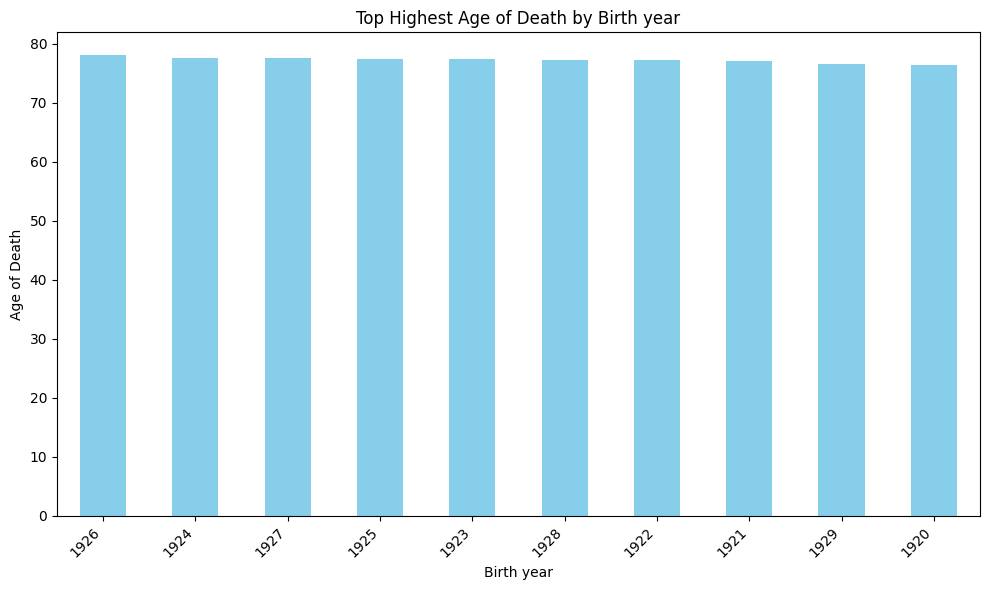

In [17]:
max_age_by_birth_year = age.groupby('Birth year')['Age of death'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
max_age_by_birth_year.plot(kind='bar', color='skyblue')
plt.title('Top Highest Age of Death by Birth year')
plt.xlabel('Birth year')
plt.ylabel('Age of Death')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## GIới tính


Ở tập dữ liệu, ta có thể thấy rất nhiều giới tính khác nhau được đề cập:

In [18]:
age['Gender'].unique()

array(['Male', 'Female', nan, 'Transgender Female', 'Intersex',
       'Transgender Person; Intersex; Transgender Male', 'Non-Binary',
       'Transgender Male', 'Transgender Female; Female',
       'Transgender Female; Male', 'Female; Male',
       'Intersex; Transgender Male', 'Eunuch; Male',
       'Transgender Male; Female', 'Transgender Male; Male',
       'Intersex; Female', 'Transgender Female; Intersex',
       'Female; Female'], dtype=object)

In [19]:
age['Gender'].value_counts()

Male                                              782421
Female                                             91091
Transgender Female                                    50
Transgender Male                                      27
Intersex                                               5
Female; Male                                           5
Transgender Female; Male                               2
Transgender Male; Female                               2
Non-Binary                                             2
Transgender Female; Female                             1
Transgender Person; Intersex; Transgender Male         1
Intersex; Transgender Male                             1
Eunuch; Male                                           1
Transgender Male; Male                                 1
Intersex; Female                                       1
Transgender Female; Intersex                           1
Female; Female                                         1
Name: Gender, dtype: int64

Ta sẽ quy chuẩn về 3 giới tính duy nhất đó là Male, Female, Others.

In [20]:
# replace all values except 'Male' and 'Female' with 'Others'
age['Gender'].replace(to_replace=age['Gender'].unique().tolist()[2:], value='Others', inplace=True)


In [21]:
age['Gender'].value_counts()

Male      782421
Others    110587
Female     91091
Name: Gender, dtype: int64

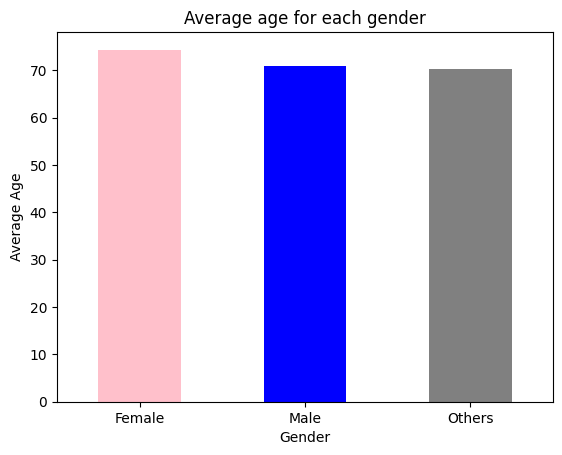

In [22]:
mean_ages = []
genders = list(age['Gender'].unique())
# 'Male' ,'Female', 'Others'
age_gender =  age.groupby('Gender')['Age of death'].mean()

age_gender.plot(kind='bar',color=['pink','blue','gray'])
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average age for each gender')
plt.xticks(rotation=0) # make text vertical
plt.show()

Độ chênh lệch độ tuổi với giới tính khi so sánh với nhau có vẻ không chênh lệch quá nhiều

In [23]:
# Perform one-hot encoding for the 'Gender' column
age_encoded = pd.get_dummies(age, columns=['Gender'])

# Display the encoded dataset
age_encoded.head(18)

,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century,Gender_Female,Gender_Male,Gender_Others
1,United Kingdom,Artist,1952,2001.0,49.0,20,21.0,0,1,0
2,United States of America,Politician,1809,1865.0,56.0,19,19.0,0,1,0
6,France,Artist,1888,1976.0,88.0,19,20.0,0,1,0
7,France,Artist,1840,1926.0,86.0,19,20.0,0,1,0
10,United States of America,Artist,1935,1977.0,42.0,20,20.0,0,1,0
12,Chile,Politician,1918,2016.0,98.0,20,21.0,0,1,0
14,Nazi Germany; Austria-Hungary; Weimar Republic...,Statesperson,1889,1945.0,56.0,19,20.0,0,1,0
16,Kingdom of the Netherlands,Athlete,1921,1984.0,63.0,20,20.0,0,1,0
17,Chile,Politician,1915,2006.0,91.0,20,21.0,0,1,0
18,Byelorussian Soviet Socialist Republic; Russia...,Artist,1882,1942.0,60.0,19,20.0,0,1,0


one hot encoding for gender


In [24]:
genders = list(age['Gender'].unique())
gender_matrix = []


## Nghề nghiệp


In [25]:
age['Occupation'].value_counts()

Artist                                          239481
Politician                                      153316
Athlete                                         106905
Researcher                                       77755
Military personnel                               40142
                                                 ...  
Mentalism; magician                                  1
Conductor; bandleader; talent agent                  1
Trumpeter; consultant                                1
Animator; television producer; film producer         1
Privateer; pirate                                    1
Name: Occupation, Length: 7520, dtype: int64

Có vẻ số lượng nghề nghiệp khác nhau có tận gần 10000 nghề nghiệp khác nhau được đề cập trong tập dữ liệu, và ta có thể để ý tại cột ở dưới cùng ta có thể thấy rằng một số người có thể làm nhiều việc dhính cùng lúc cho tới khi họ chết (công việc mà họ dành nhiều thời gian làm nhất trong đời).

Ta có thể xem xét một vài nghề nghiệp có số lượng người cao nhất (dựa theo trong tập dữ liệu).

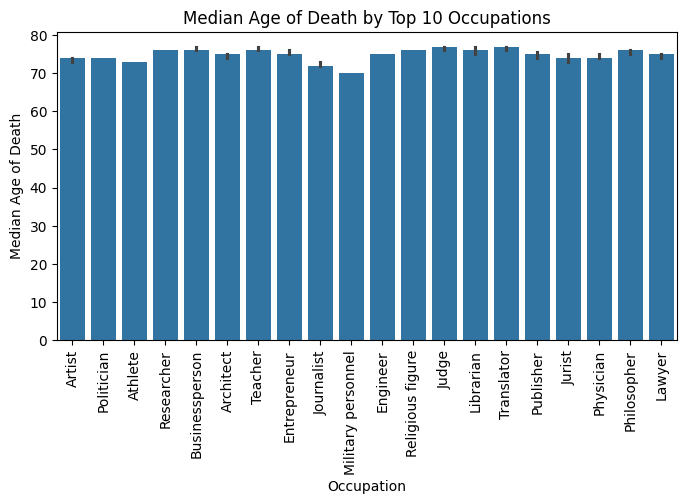

In [26]:
top_occupations = age['Occupation'].value_counts().nlargest(20).index.tolist()

age_top_10 = age[age['Occupation'].isin(top_occupations)]

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=age_top_10, x='Occupation', y='Age of death', estimator=np.median)

plt.xticks(rotation=90)
plt.title('Median Age of Death by Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Median Age of Death')
plt.show()

Nghề nghiệp có tuổi trung bình cao nhất dựa theo dữ liệu

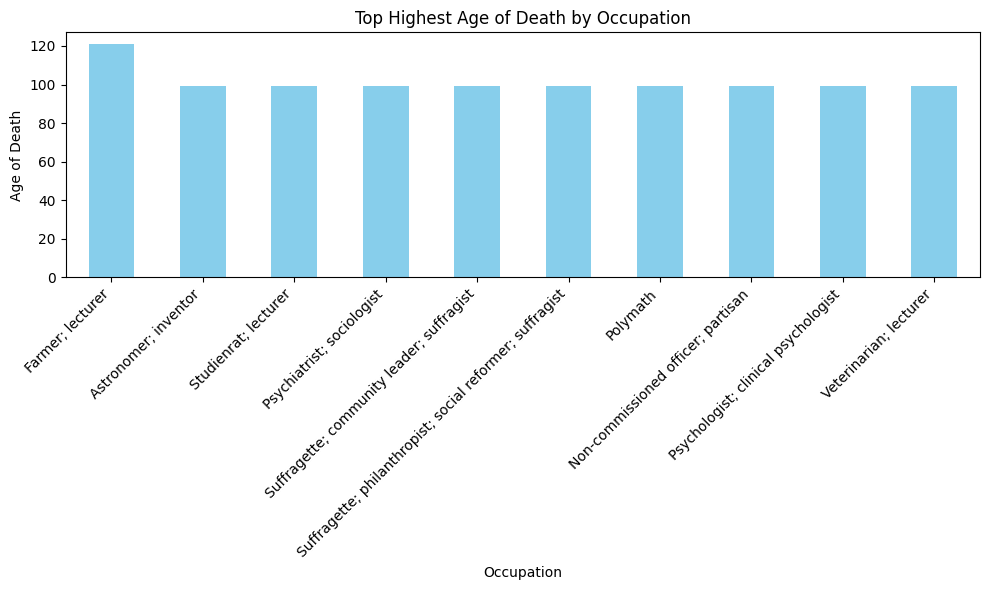

In [27]:
max_age_by_occupation = age.groupby('Occupation')['Age of death'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
max_age_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Top Highest Age of Death by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age of Death')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ta có thể nhận thấy rằng nghề nghiệp dẫn đầu thì tập dữ liệu lại có quá ít điều này ảnh hưởng tới performance của dự đoán

In [28]:
age[age['Occupation']=='Farmer; lecturer']

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
64349,Male,Japan,Farmer; lecturer,1865,1986.0,121.0,19,20.0


In [29]:
age[age['Occupation']=='Comedian; jazz guitarist']

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
198386,Male,United States of America,Comedian; jazz guitarist,1911,2010.0,99.0,20,21.0


Và để cân bằng lại dữ liệu ta sẽ sử dụng nghề nghiệp khi mà tập dữ liệu không bị mất cân bằng quá lớn

In [30]:
age['Occupation'] = age['Occupation'].str.lower()

threshold = 1000
counts = age['Occupation'].value_counts()
rare_occupations = counts[counts < threshold].index
age = age[~age['Occupation'].isin(rare_occupations)]


Sau khi làm sạch dữ liệu Occupation ta sẽ kiểm tra sự khác biệt

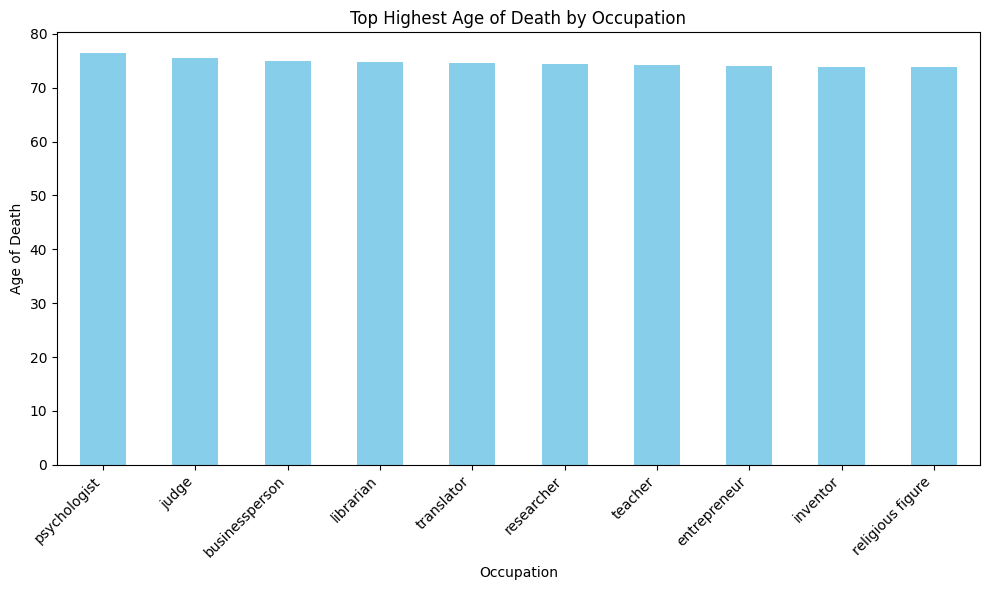

In [31]:
max_age_by_occupation = age.groupby('Occupation')['Age of death'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
max_age_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Top Highest Age of Death by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age of Death')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [32]:
age[age['Occupation'] == 'psychologist']

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
1841,Male,United States of America,psychologist,1884,1952.0,68.0,19,20.0
8291,Male,Germany,psychologist,1874,1932.0,58.0,19,20.0
13218,Male,Russia; Soviet Union,psychologist,1930,1998.0,68.0,20,20.0
14793,Male,Austria,psychologist,1874,1908.0,34.0,19,20.0
15437,Female,United States of America; Austria,psychologist,1908,1958.0,50.0,20,20.0
...,...,...,...,...,...,...,...,...
1208643,Others,People's Republic of China; Qing dynasty; Repu...,psychologist,1903,1996.0,93.0,20,20.0
1210079,Female,NaN,psychologist,1919,1998.0,79.0,20,20.0
1211427,Others,Denmark,psychologist,1940,2011.0,71.0,20,21.0
1213230,Female,Italy,psychologist,1920,2018.0,98.0,20,21.0


## Freg endc


In [33]:
import pandas as pd

occupation_counts = age_encoded['Occupation'].value_counts().sort_values(ascending=False)

def freq_encode(x, occupation_counts):
  try:
    return occupation_counts.loc[x]
  except:
    return np.NAN

age_encoded['Occupation_Encoded'] = age_encoded['Occupation'].apply(lambda x: freq_encode(x, occupation_counts))




In [34]:
age_encoded['Occupation_Encoded'].value_counts()

239481.0    239481
153316.0    153316
106905.0    106905
77755.0      77755
40142.0      40142
             ...  
73.0            73
60.0            60
57.0            57
41.0            41
40.0            40
Name: Occupation_Encoded, Length: 249, dtype: int64

## Quốc tịch

In [35]:
age['Country'].value_counts()

United States of America                                                                                                                                     130502
Germany                                                                                                                                                       72108
France                                                                                                                                                        50887
United Kingdom; United Kingdom of Great Britain and Ireland                                                                                                   27529
Sweden                                                                                                                                                        21507
                                                                                                                                                              ...  
Bavaria; Austria

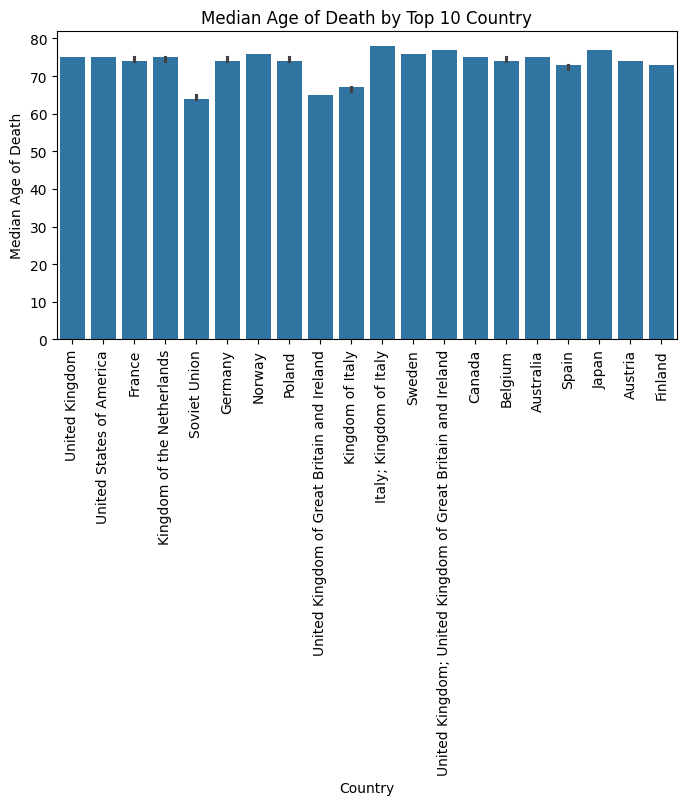

In [36]:
top_occupations = age['Country'].value_counts().nlargest(20).index.tolist()

age_top_10 = age[age['Country'].isin(top_occupations)]

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=age_top_10, x='Country', y='Age of death', estimator=np.median)

plt.xticks(rotation=90)
plt.title('Median Age of Death by Top 10 Country')
plt.xlabel('Country')
plt.ylabel('Median Age of Death')
plt.show()

Dưới đây ta cũng xét nghề nghiệp có độ tuổi trung bình cao nhất

<ipython-input-37-3bf33bce527e>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


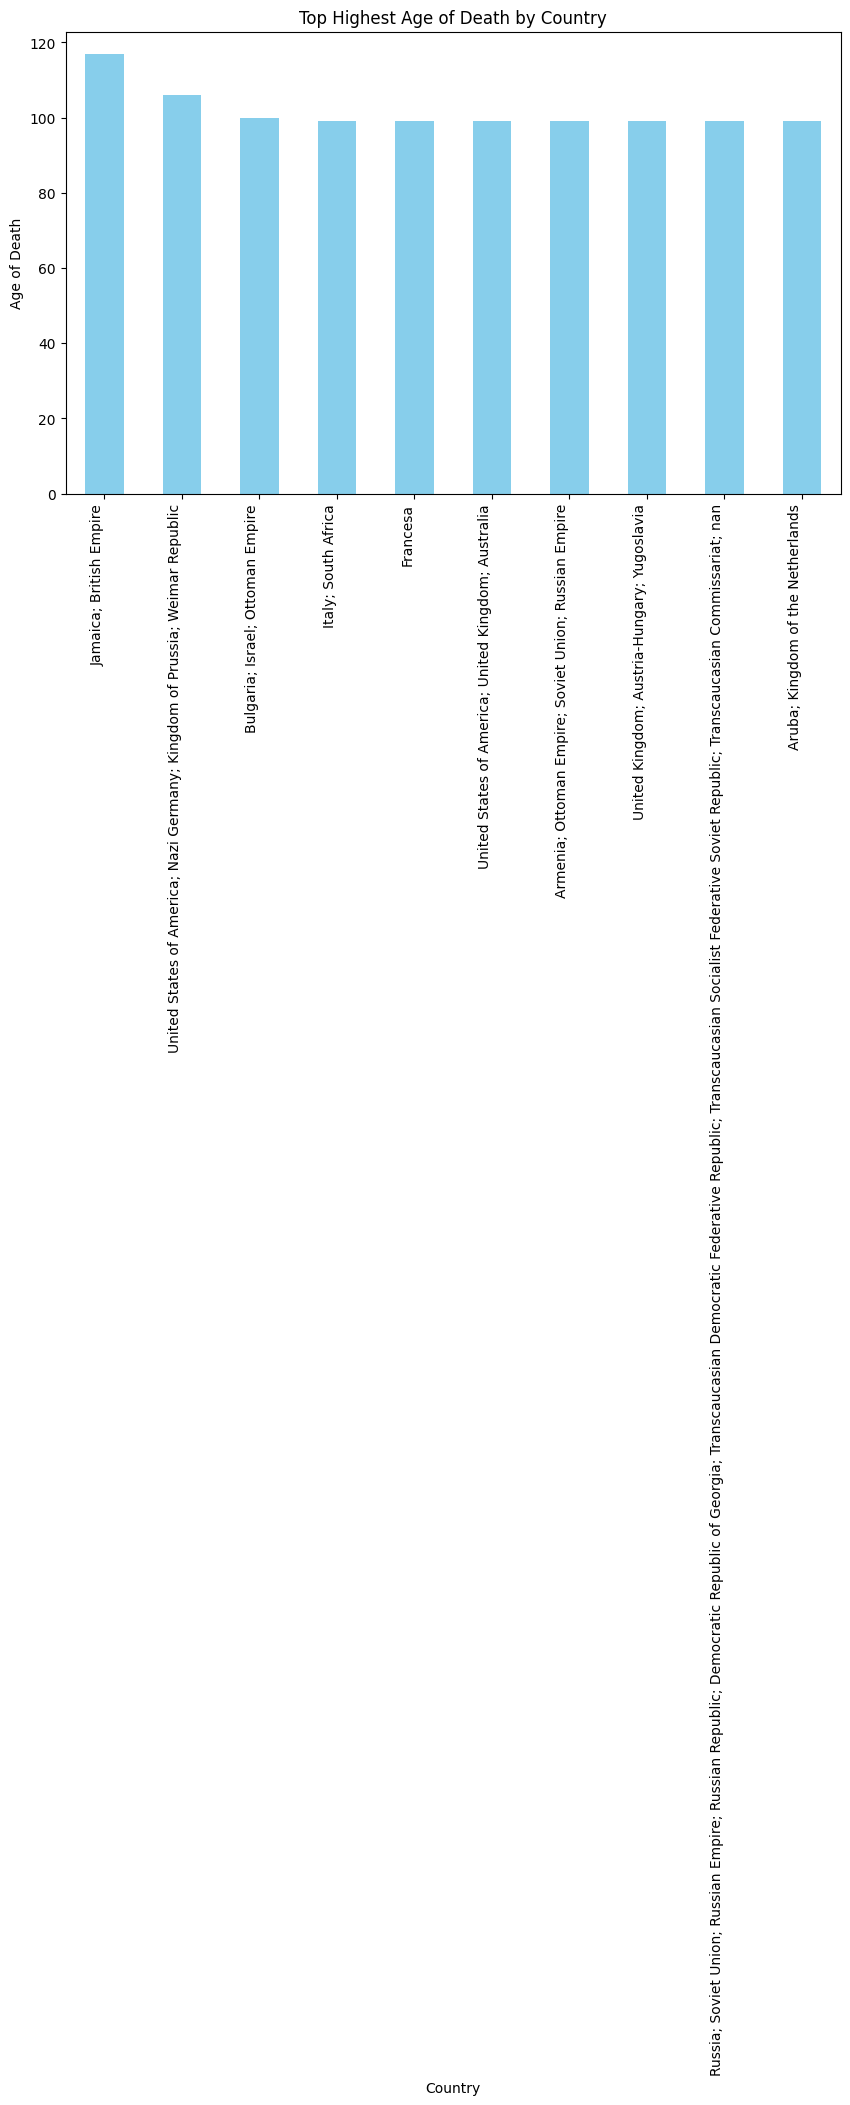

In [37]:
max_age_by_occupation = age.groupby('Country')['Age of death'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
max_age_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Top Highest Age of Death by Country')
plt.xlabel('Country')
plt.ylabel('Age of Death')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


Vì thế ta sẽ làm sạch dữ liệu tương tự như với cách đã làm với nghề nghiệp ở trên

In [38]:
threshold = 1000
counts = age['Country'].value_counts()
rare_occupations = counts[counts < threshold].index
age = age[~age['Country'].isin(rare_occupations)]


In [39]:
age

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
1,Male,United Kingdom,artist,1952,2001.0,49.0,20,21.0
2,Male,United States of America,politician,1809,1865.0,56.0,19,19.0
6,Male,France,artist,1888,1976.0,88.0,19,20.0
7,Male,France,artist,1840,1926.0,86.0,19,20.0
10,Male,United States of America,artist,1935,1977.0,42.0,20,20.0
...,...,...,...,...,...,...,...,...
1223001,Others,NaN,artist,1911,1979.0,68.0,20,20.0
1223003,Others,NaN,physician,1870,1956.0,86.0,19,20.0
1223006,Others,Germany,military personnel,1920,1944.0,24.0,20,20.0
1223007,Male,United Kingdom,artist,1887,1915.0,28.0,19,20.0


Trông có vẻ cũng khá là giống so với nghề nghiệp, ta có thể chính vì thế ta cũng sẽ thao tác xử lý tương tự với nghề nghiệp

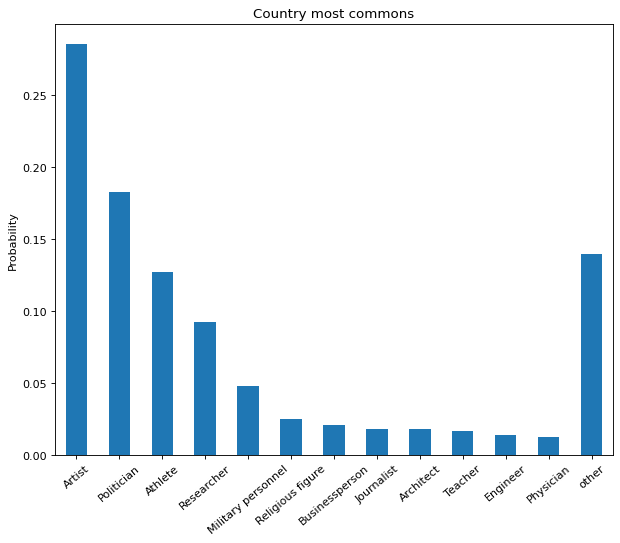

In [40]:
figure(figsize=(9, 7), dpi=80)
prob = age_encoded['Occupation'].value_counts(normalize=True)
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.title('Country most commons')
plt.ylabel("Probability")
plt.xticks(rotation=40)
plt.show()

Chúng ta muôn sử dụng các dữ liệu dạng chứ vì thế trước khi có thể đưa vào mô hình học máy hay học sâu bất kỳ thì ở đây chúng tôi sẽ sử dụng phương pháp label encoded cho chúng

In [41]:
data = age.dropna()
data

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century
1,Male,United Kingdom,artist,1952,2001.0,49.0,20,21.0
2,Male,United States of America,politician,1809,1865.0,56.0,19,19.0
6,Male,France,artist,1888,1976.0,88.0,19,20.0
7,Male,France,artist,1840,1926.0,86.0,19,20.0
10,Male,United States of America,artist,1935,1977.0,42.0,20,20.0
...,...,...,...,...,...,...,...,...
1222999,Others,Kingdom of the Netherlands,teacher,1901,1965.0,64.0,20,20.0
1223000,Male,Switzerland,entrepreneur,1857,1924.0,67.0,19,20.0
1223006,Others,Germany,military personnel,1920,1944.0,24.0,20,20.0
1223007,Male,United Kingdom,artist,1887,1915.0,28.0,19,20.0


In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


data['Occupation_encoded'] = label_encoder.fit_transform(data['Occupation'])

data['Country_encoded'] = label_encoder.fit_transform(data['Country'])
data['Gender_endcoded'] = label_encoder.fit_transform(data['Gender'])
data


<ipython-input-42-65d44f05ab98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Occupation_encoded'] = label_encoder.fit_transform(data['Occupation'])
<ipython-input-42-65d44f05ab98>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country_encoded'] = label_encoder.fit_transform(data['Country'])
<ipython-input-42-65d44f05ab98>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Gender,Country,Occupation,Birth year,Death year,Age of death,Birth century,Death century,Occupation_encoded,Country_encoded,Gender_endcoded
1,Male,United Kingdom,artist,1952,2001.0,49.0,20,21.0,1,53,1
2,Male,United States of America,politician,1809,1865.0,56.0,19,19.0,21,56,1
6,Male,France,artist,1888,1976.0,88.0,19,20.0,1,16,1
7,Male,France,artist,1840,1926.0,86.0,19,20.0,1,16,1
10,Male,United States of America,artist,1935,1977.0,42.0,20,20.0,1,56,1
...,...,...,...,...,...,...,...,...,...,...,...
1222999,Others,Kingdom of the Netherlands,teacher,1901,1965.0,64.0,20,20.0,29,30,2
1223000,Male,Switzerland,entrepreneur,1857,1924.0,67.0,19,20.0,7,51,1
1223006,Others,Germany,military personnel,1920,1944.0,24.0,20,20.0,16,19,2
1223007,Male,United Kingdom,artist,1887,1915.0,28.0,19,20.0,1,53,1


In [43]:
cor = data.drop(['Gender','Country','Occupation'],axis=1)

corr_temp=cor.corr()
corr_temp.style.background_gradient(cmap='coolwarm')

,Birth year,Death year,Age of death,Birth century,Death century,Occupation_encoded,Country_encoded,Gender_endcoded
Birth year,1.000000,0.929348,0.061387,0.808853,0.763648,-0.151360,0.008769,-0.026958
Death year,0.929348,1.000000,0.425559,0.775541,0.820472,-0.115200,0.008245,-0.039750
Age of death,0.061387,0.425559,1.000000,0.114092,0.346354,0.059553,0.000795,-0.041386
Birth century,0.808853,0.775541,0.114092,1.000000,0.611662,-0.111235,0.014227,-0.018301
Death century,0.763648,0.820472,0.346354,0.611662,1.000000,-0.080906,0.008529,-0.036942
Occupation_encoded,-0.151360,-0.115200,0.059553,-0.111235,-0.080906,1.000000,-0.070725,0.083676
Country_encoded,0.008769,0.008245,0.000795,0.014227,0.008529,-0.070725,1.000000,-0.076451
Gender_endcoded,-0.026958,-0.039750,-0.041386,-0.018301,-0.036942,0.083676,-0.076451,1.000000


# Machine learing method
... not yet

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = cor

selected_features = ['Birth year', 'Country_encoded', 'Birth century', 'Occupation_encoded']

X = data[selected_features]
y = data['Age of death']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)



Mean Squared Error: 220.6814263495385
Root Mean Squared Error: 14.85535009178641


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 195.00840943080664
Root Mean Squared Error: 13.964541146446834


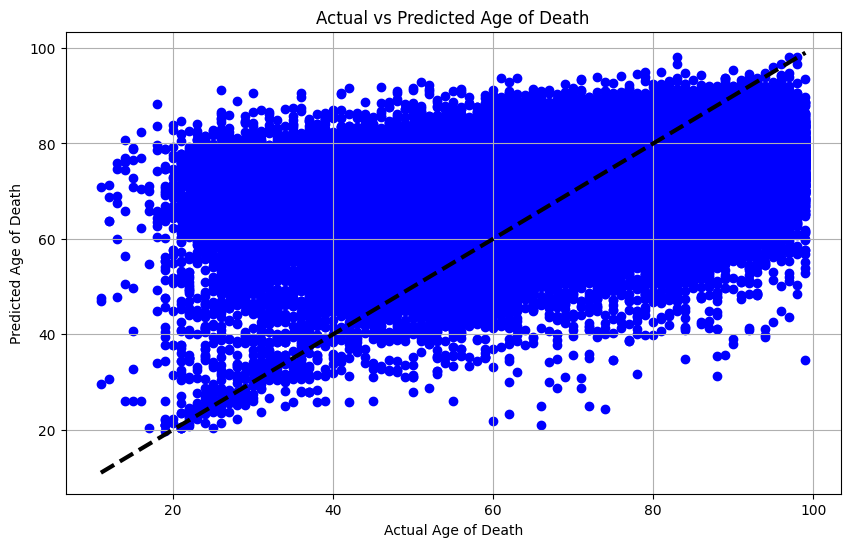

In [46]:
# Visualization of model evaluation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Age of Death')
plt.ylabel('Predicted Age of Death')
plt.title('Actual vs Predicted Age of Death')
plt.grid(True)
plt.show()

# Deep learning method
... not yet

Epoch 1/20
5845/5845 [==============================] - 26s 4ms/step - loss: 431.3711 - val_loss: 213.8993
Epoch 2/20
5845/5845 [==============================] - 22s 4ms/step - loss: 297.7745 - val_loss: 212.9302
Epoch 3/20
5845/5845 [==============================] - 22s 4ms/step - loss: 283.7151 - val_loss: 217.6813
Epoch 4/20
5845/5845 [==============================] - 21s 4ms/step - loss: 274.9966 - val_loss: 212.3938
Epoch 5/20
5845/5845 [==============================] - 22s 4ms/step - loss: 268.2440 - val_loss: 211.6754
Epoch 6/20
5845/5845 [==============================] - 24s 4ms/step - loss: 262.5043 - val_loss: 211.8970
Epoch 7/20
5845/5845 [==============================] - 21s 4ms/step - loss: 259.5515 - val_loss: 211.8325
Epoch 8/20
5845/5845 [==============================] - 22s 4ms/step - loss: 250.6990 - val_loss: 203.6553
Epoch 9/20
5845/5845 [==============================] - 22s 4ms/step - loss: 243.6810 - val_loss: 203.9914
Epoch 10/20
5845/5845 [==============

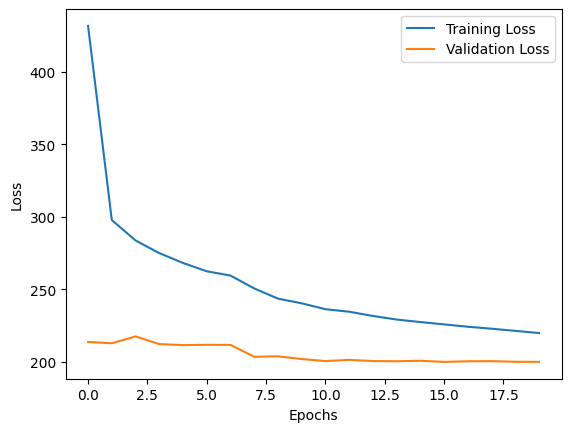

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error

data = cor

selected_features = ['Birth year', 'Country_encoded', 'Birth century', 'Occupation_encoded']

X = data[selected_features]
y = data['Age of death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


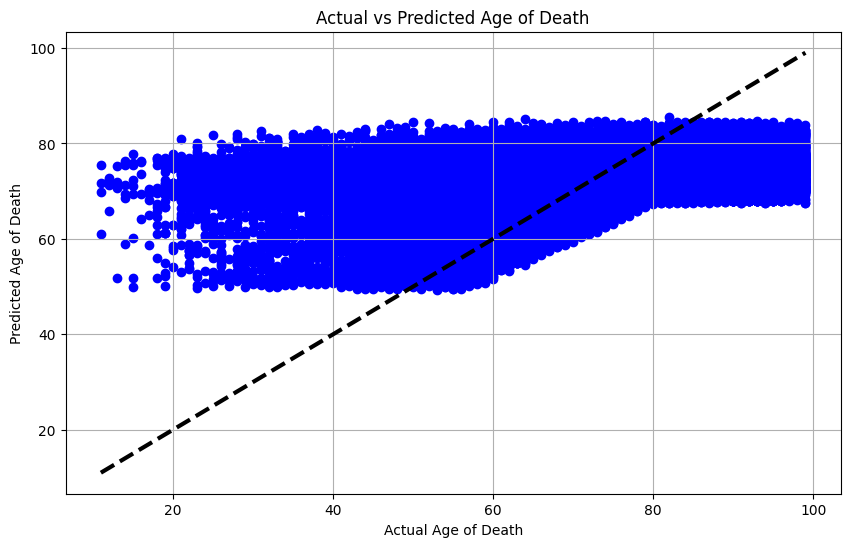

In [49]:
# Visualization of model evaluation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Age of Death')
plt.ylabel('Predicted Age of Death')
plt.title('Actual vs Predicted Age of Death')
plt.grid(True)
plt.show()

Epoch 1/50
5845/5845 [==============================] - 24s 4ms/step - loss: 424.7245 - val_loss: 218.4841
Epoch 2/50
5845/5845 [==============================] - 22s 4ms/step - loss: 295.0853 - val_loss: 211.6236
Epoch 3/50
5845/5845 [==============================] - 22s 4ms/step - loss: 283.6768 - val_loss: 214.1332
Epoch 4/50
5845/5845 [==============================] - 21s 4ms/step - loss: 274.7644 - val_loss: 214.5827
Epoch 5/50
5845/5845 [==============================] - 23s 4ms/step - loss: 268.0960 - val_loss: 212.2005
Epoch 6/50
5845/5845 [==============================] - 24s 4ms/step - loss: 263.3805 - val_loss: 211.7641
Epoch 7/50
5845/5845 [==============================] - 21s 4ms/step - loss: 258.8082 - val_loss: 208.3891
Epoch 8/50
5845/5845 [==============================] - 22s 4ms/step - loss: 248.4037 - val_loss: 202.1443
Epoch 9/50
5845/5845 [==============================] - 22s 4ms/step - loss: 243.9397 - val_loss: 201.9153
Epoch 10/50
5845/5845 [==============

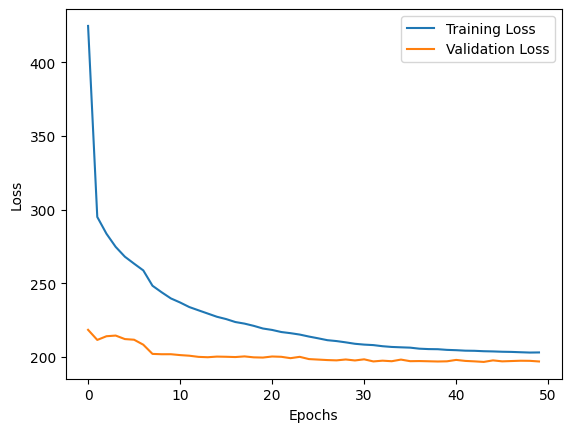

In [57]:
#more epoch ??
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
# trainfes
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

#  evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()